# 온라인 쇼핑몰 매출관계분석

- 국가통계포털 https://kosis.kr/index/index.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년전후로 분리되어서 미리 합침)
- 행렬을 전환
<div style="display:flex">
  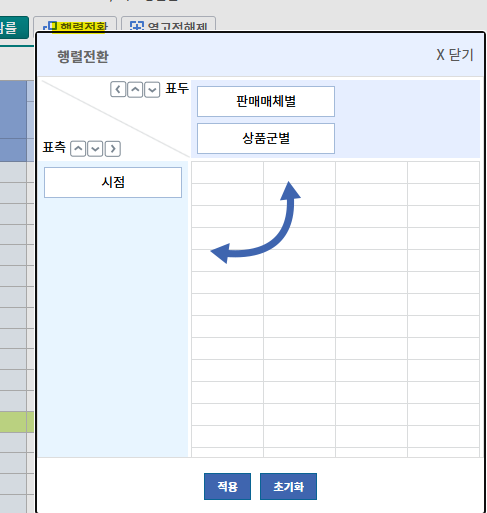
  <image style="padding:10px" src = "attachment:a197dee8-e9ce-45e1-af4d-2ec6b6d193f0.png" width=220>  
</div>
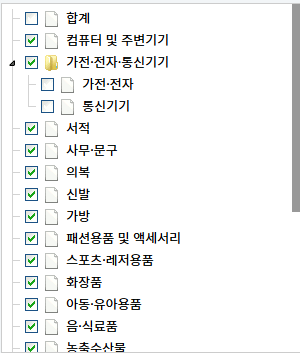

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [27]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"]="D2Coding"

In [30]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액_20250227150411.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.columns = ["category","date","internet","mobile"]
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [33]:
print("수정전")
print(ori['date'].tail)
ori['date'] = ori['date'].map(lambda x:x.rstrip(" p)")) # 없애는 것도 가능
print("수정후")
print(ori['date'].tail())

수정전
<bound method NDFrame.tail of 0          2017.01
1          2017.02
2          2017.03
3          2017.04
4          2017.05
           ...    
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, Length: 2208, dtype: object>
수정후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [43]:
ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')
ori.dtypes
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017-01-01,288391,133993
1,컴퓨터 및 주변기기,2017-02-01,329143,146200
2,컴퓨터 및 주변기기,2017-03-01,322089,151262
3,컴퓨터 및 주변기기,2017-04-01,251604,116675
4,컴퓨터 및 주변기기,2017-05-01,241871,109053


In [38]:
ex1_data = ori.copy()

In [40]:
ex1_data = ori.copy()
ex1_data[120:150]

,category,date,internet,mobile
120,가전·전자·통신기기,2019.01,451529,611551
121,가전·전자·통신기기,2019.02,403124,578935
122,가전·전자·통신기기,2019.03,568865,756020
123,가전·전자·통신기기,2019.04,523731,610496
124,가전·전자·통신기기,2019.05,577082,719082
125,가전·전자·통신기기,2019.06,488946,688858
126,가전·전자·통신기기,2019.07,522133,708286
127,가전·전자·통신기기,2019.08,511230,687235
128,가전·전자·통신기기,2019.09,462355,634009
129,가전·전자·통신기기,2019.10,525905,674287


In [46]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category']=='음식서비스']
obj = ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1637,여행 및 교통서비스,2017-06-01,605089,605819
1921,음식서비스,2017-02-01,28759,145165
1923,음식서비스,2017-04-01,30273,166271
526,신발,2020-11-01,109037,203835
1634,여행 및 교통서비스,2017-03-01,510654,561942


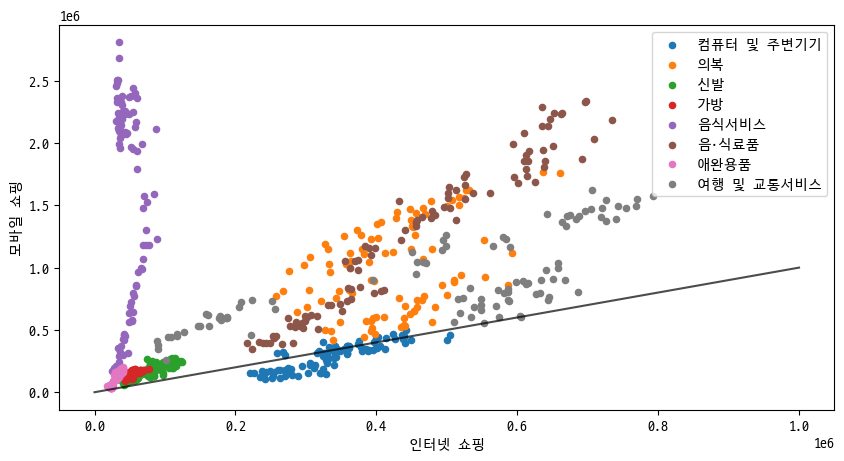

In [68]:
fig, ax = plt.subplots(figsize=(10,5))

category = obj # ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = cate)
    

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.7)
plt.show()
# print(category_data,x_data,y_data)